In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Solution

In [2]:
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

class OpenEyesClassificator:
  def __init__(self, path_to_weights = './my_modell.h5'):
    self.best_model = load_model(path_to_weights)

  def predict(self, inplm):
    img_size = 224
    img_array = cv2.imread(inplm, cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
    new_array = cv2.resize(backtorgb, (img_size, img_size))
    X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
    X_input = X_input/255.0
    is_open_score = self.best_model.predict(X_input)[0][0]
    return is_open_score

Eye = OpenEyesClassificator('/content/drive/MyDrive/Eyes_project/my_modell.h5')
print(Eye.predict('/content/drive/MyDrive/Eyes_project/EyesDataset/000000.jpg'))

1/1 [==============================] - 3s 3s/step
0.016862232


# Task

Необходимо натренировать классификатор открытых/закрытых глаз, используя заданную обучающую выборку. Решение будет проверяться на тестовой выборке, которая тебе недоступна. Обе выборки были взяты из одной базы изображений. Решение должно быть реализовано в python в виде класса OpenEyesClassificator для классификатора c методами __init__(self) (где инициализируется и загружается модель) и метода predict(self, inpIm), где inpIm - полный путь к изображению глаза, который возвращает is_open_score - float score классификации от 0.0 до 1.0 (где 1 - открыт, 0 - закрыт). Обучающая выборка доступна по ссылке: https://drive.google.com/file/d/122BgFHJG8Kgn1E_bkT1Lu8I1Cf10glVn/view?usp=sharing

Нужно прислать эту функцию со списком необходимых для запуска решения библиотек. Рядом с основной функцией могут лежать вспомогательные файлы (например, веса сети). Помимо функции решения ждем от вас короткий отчет (2-3стр.) с описанием задачи, мотивацией и кратким изложением выбранного метода, промежуточными результатами (например анализ метода для разных значений параметров, тренировочные / валидационные ошибки, ... ), результатами на валидационной выборке в виде EER (Equal error rate) и сложных/простых примеров картинок, выводами и ссылками на литературу. EERмы ожидаем меньше 0.05

Особенности задачи - выборка не содержит меток классов открытых или закрытых глаз. Полная либо частичная разметка выборки, unsupervisedкластеризация и т.д. - все это является частью задачи и остается на ваше усмотрение.

По срокам просьба выполнить тестовое до 06.03 включительно

# Methods
1. Clustering (pca, hog, autoencoder)
2. Semi-supervised learning
3. Transfer learning
4. Finetuning

# Image clustering


https://towardsdatascience.com/a-step-by-step-guide-for-clustering-images-4b45f9906128

https://erdogant.github.io/clustimage/pages/html/Cluster%20Evaluation.html#dbscan

In [5]:
pip install clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=6f0a076515d3f73929ef5559cbb10235bee0623cda527e1453508c244881acb9
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=8c3c4970438b74815ab5c0b030b813cf1bb3e6635d690c6691dce1b19960f45e
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
  Cre

## PCA

[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Extracting images from: [/content/drive/MyDrive/Eyes_project/EyesDataset]
[clustimage] >INFO> [4000] files are collected recursively from path: [/content/drive/MyDrive/Eyes_project/EyesDataset]
[clustimage] >INFO> [4000] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 4000/4000 [01:27<00:00, 45.54it/s] 
[clustimage] >INFO> Extracting features using method: [pca]


[pca] >Column labels are auto-completed.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [12288] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [46] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [12288] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.


[clustimage] >INFO> Extracted features using [pca]: samples=4000, features=46
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster evaluation using the [high] feature space of the [pca] features.



[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 1/1 [00:00<00:00,  3.86it/s]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (4000, 46) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


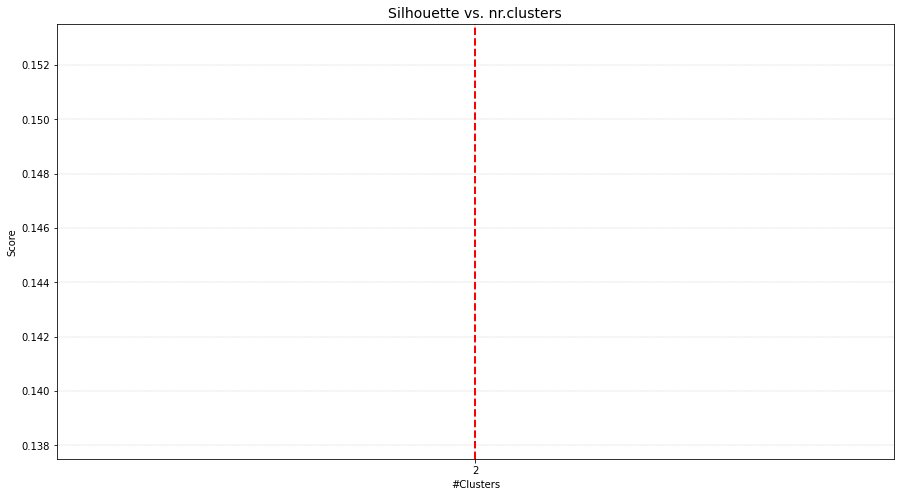

[clusteval] >Estimated number of n_clusters: 2, average silhouette_score=0.351


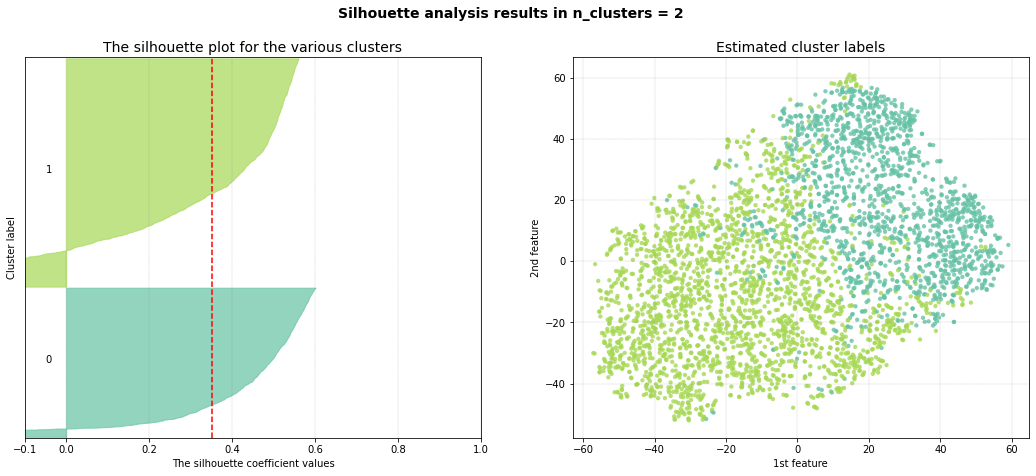

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=162620.412. Be patient now..
[clusteval] >Compute cluster labels.


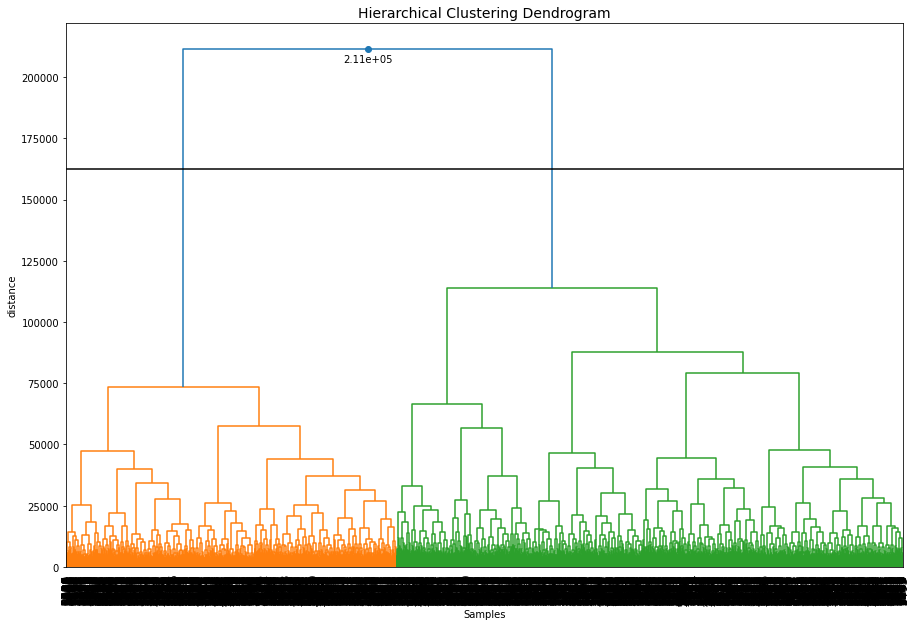

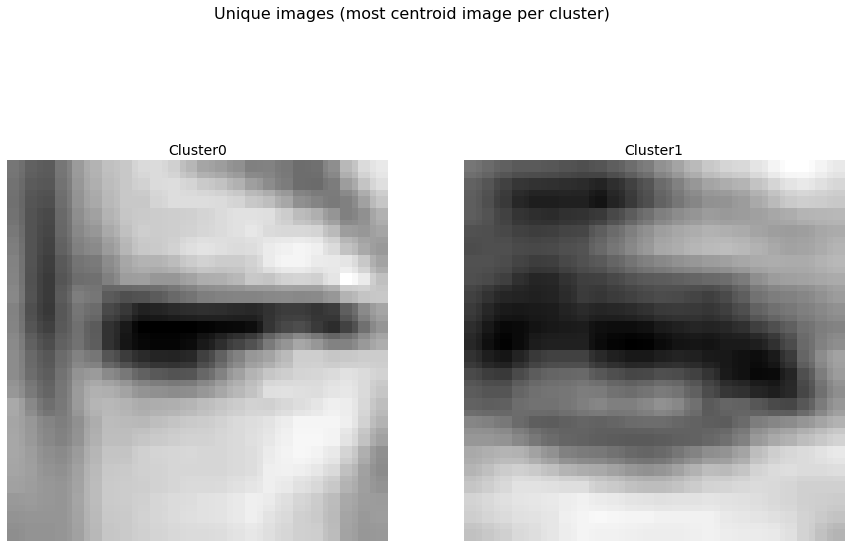

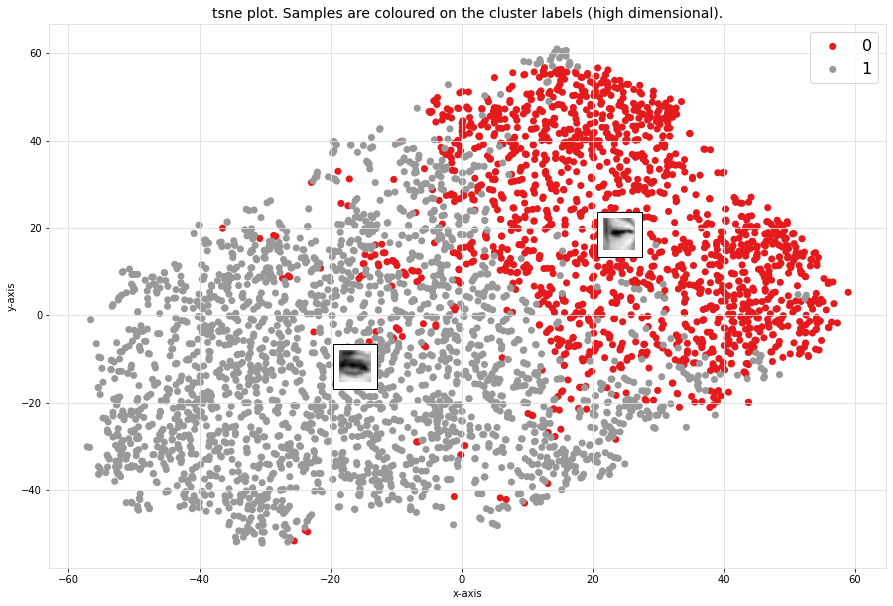

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 432x288 with 0 Axes>

In [6]:
# Import library
from clustimage import Clustimage

# init
cl_pca = Clustimage(method='pca', grayscale=False, dim=(64,64))

# Preproceesing, cluster detection
results_pca = cl_pca.fit_transform('/content/drive/MyDrive/Eyes_project/EyesDataset', min_clust=1, max_clust=3)

# Silhouette plots
cl_pca.clusteval.plot()
cl_pca.clusteval.scatter(cl_pca.results['xycoord'])

# Dendrogram
cl_pca.dendrogram()

# Plot unique image per cluster
cl_pca.plot_unique(img_mean=False)

# Scatterplot
cl_pca.scatter(dotsize=50, zoom=0.5, img_mean=False)

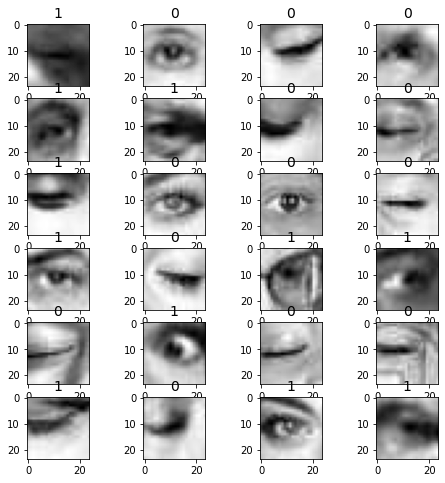

In [7]:
from PIL import Image

fig = plt.figure(figsize=(8, 8))

for i in range(24):
  image = Image.open('/content/drive/MyDrive/Eyes_project/EyesDataset/' + cl_pca.results['filenames'][i])
  fig.add_subplot(6, 4, i+1)
  plt.imshow(image, cmap = 'gray')
  plt.title(cl_pca.results['labels'][i])

In [8]:
import pandas as pd
  
data = []

for i in range(4000):
  data.append([cl_pca.results['filenames'][i], cl_pca.results['labels'][i]])

df = pd.DataFrame(data, columns=['Image','Opened'])

In [9]:
path = '/content/drive/MyDrive/Eyes_project/pca_labels.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [44]:
df = pd.read_csv('/content/drive/MyDrive/Eyes_project/pca_labels.csv')

In [45]:
from PIL import Image

preds = []

for i in range(4000):
  if str(df['Image'][i]) < '000200.jpg' and str(df['Image'][i]) >= '000000.jpg':
    image = Image.open('/content/drive/MyDrive/Eyes_project/EyesDataset/' + df['Image'][i])
    preds.append(df['Opened'][i])

In [46]:
preds = np.array(preds)
print(preds)

[1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0
 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0]


In [47]:
df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [48]:
ans = df.to_numpy().transpose()[0]
print(ans)

[1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0]


In [50]:
acc = 0
for i in range(200):
  if preds[i] == ans[i]:
    acc += 1
print(acc/200)

0.54


## HOG

[clustimage] >WARNING> Parameter grayscale is set to True coz you are using method="hog"
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> Cleaning previous fitted model results
[clustimage] >INFO> Extracting images from: [/content/drive/MyDrive/Eyes_project/EyesDataset]
[clustimage] >INFO> [4000] files are collected recursively from path: [/content/drive/MyDrive/Eyes_project/EyesDataset]
[clustimage] >INFO> [4000] images are extracted.
[clustimage] >INFO> Reading and checking images.
[clustimage] >INFO> Reading and checking images.
100%|██████████| 4000/4000 [00:09<00:00, 406.07it/s]
[clustimage] >INFO> Extracting features using method: [hog]
100%|██████████| 4000/4000 [00:50<00:00, 79.82it/s]
[clustimage] >INFO> Extracted features using [hog]: samples=4000, features=4096
[clustimage] >INFO> Compute [tsne] embedding
[clustimage] >INFO> Cluster ev


[clusteval] >Fit using agglomerative with metric: euclidean, and linkage: ward
[clusteval] >Evaluate using silhouette.


100%|██████████| 1/1 [00:01<00:00,  1.46s/it]
[clustimage] >INFO> Updating cluster-labels and cluster-model based on the (4000, 4096) feature-space.


[clusteval] >Compute dendrogram threshold.
[clusteval] >Optimal number clusters detected: [2].
[clusteval] >Fin.


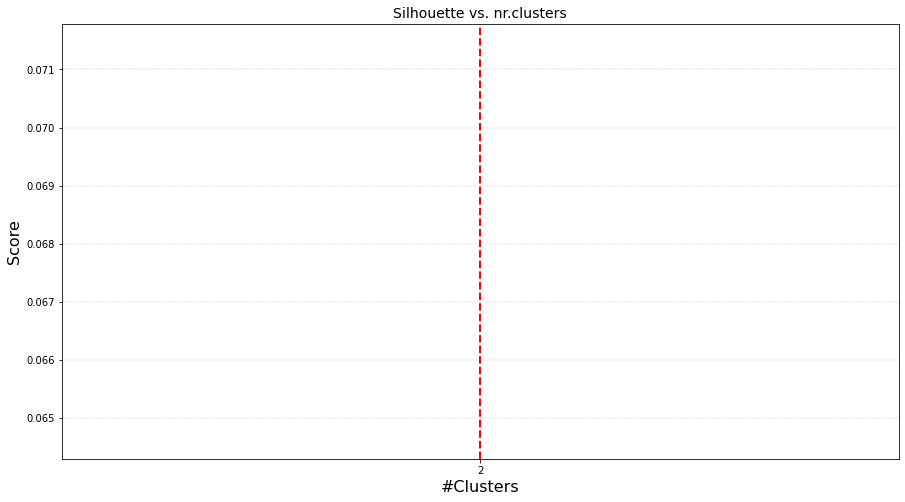

[clusteval] >Estimated number of n_clusters: 2, average silhouette_score=0.287


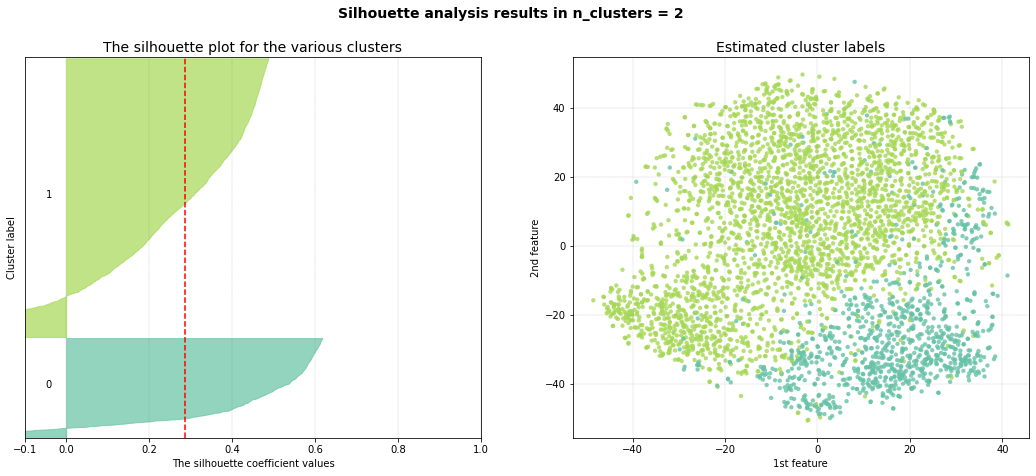

[clusteval] >Plotting the dendrogram with optimized settings: metric=euclidean, linkage=ward, max_d=3811.564. Be patient now..
[clusteval] >Compute cluster labels.


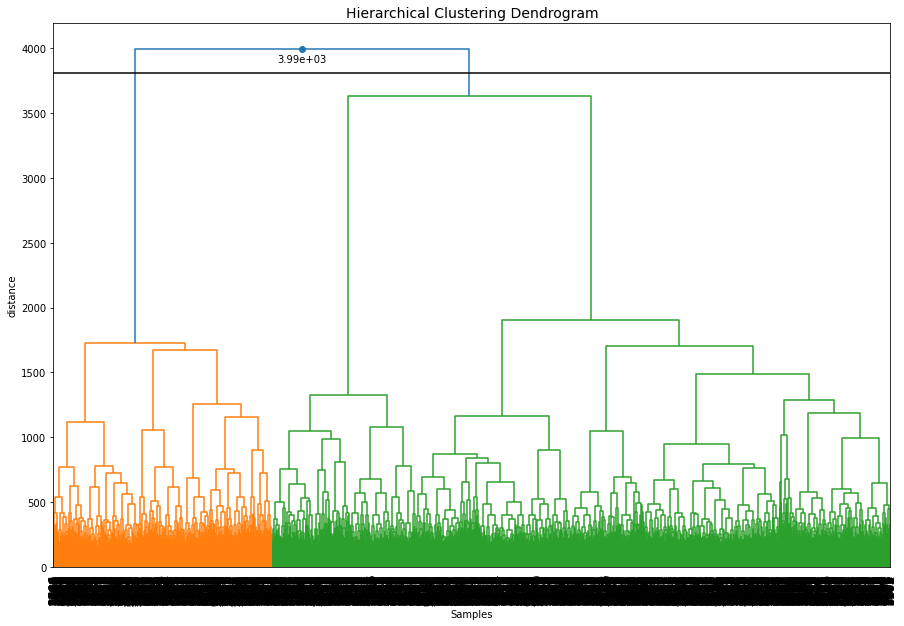

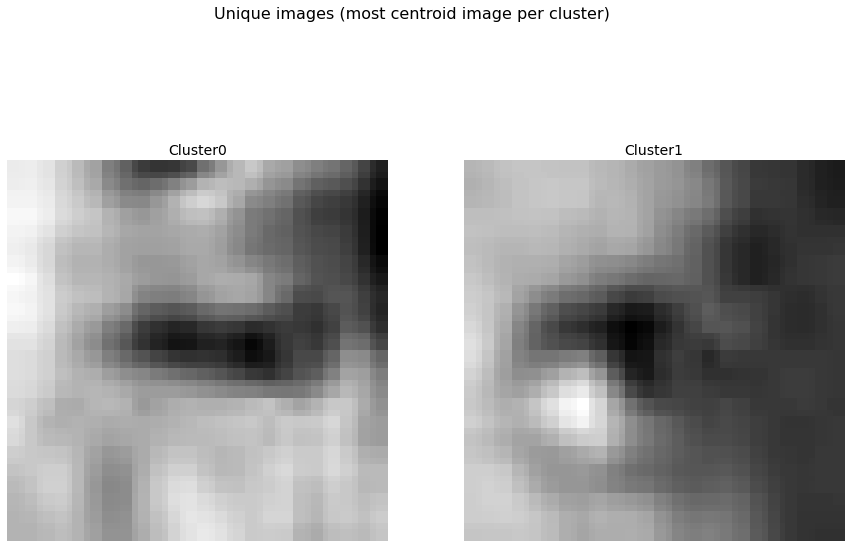

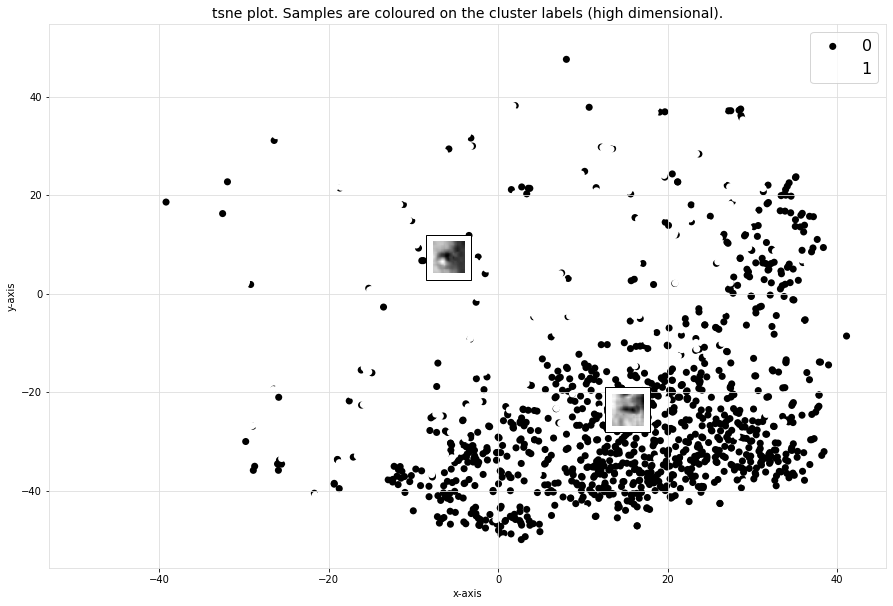

(<Figure size 1080x720 with 1 Axes>,
 <AxesSubplot:title={'center':'tsne plot. Samples are coloured on the cluster labels (high dimensional).'}, xlabel='x-axis', ylabel='y-axis'>)

<Figure size 432x288 with 0 Axes>

In [17]:
from clustimage import Clustimage

# init
cl_hog = Clustimage(method='hog', params_hog={'orientations':8, 'pixels_per_cell':(8,8)}, grayscale=False, dim=(64,64))

# Preproceesing, cluster detection
results_hog = cl_hog.fit_transform('/content/drive/MyDrive/Eyes_project/EyesDataset', min_clust=1, max_clust=3)

# Silhouette plots
cl_hog.clusteval.plot()
cl_hog.clusteval.scatter(cl_hog.results['xycoord'])

# Dendrogram
cl_hog.dendrogram()

# Plot unique image per cluster
cl_hog.plot_unique(img_mean=False)

# Scatterplot
cl_hog.scatter(dotsize=50, zoom=0.5, img_mean=False)

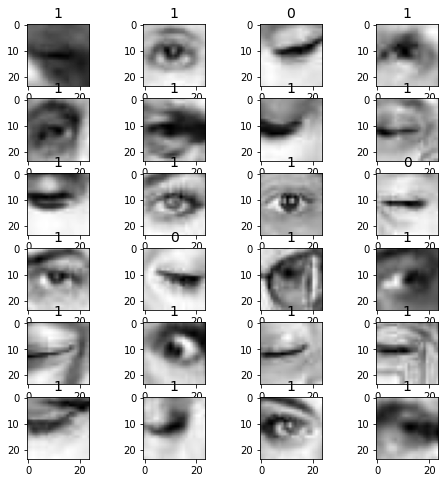

In [18]:
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))

for i in range(24):
  image = Image.open('/content/drive/MyDrive/Eyes_project/EyesDataset/' + cl_hog.results['filenames'][i])
  fig.add_subplot(6, 4, i+1)
  plt.imshow(image, cmap = 'gray')
  plt.title(cl_hog.results['labels'][i])

In [19]:
import pandas as pd
  
data = []

for i in range(4000):
  data.append([cl_hog.results['filenames'][i], cl_hog.results['labels'][i]])

df = pd.DataFrame(data, columns=['Image','Opened'])

In [20]:
path = '/content/drive/MyDrive/Eyes_project/hog_labels.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

In [51]:
df = pd.read_csv('/content/drive/MyDrive/Eyes_project/hog_labels.csv')

In [52]:
from PIL import Image

preds = []

for i in range(4000):
  if str(df['Image'][i]) < '000200.jpg' and str(df['Image'][i]) >= '000000.jpg':
    image = Image.open('/content/drive/MyDrive/Eyes_project/EyesDataset/' + df['Image'][i])
    preds.append(df['Opened'][i])

In [53]:
preds = np.array(preds)
print(preds)

[1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1
 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1]


In [54]:
df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [55]:
ans = df.to_numpy().transpose()[0]
print(ans)

[1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0]


In [57]:
acc = 0
for i in range(200):
  if preds[i] == ans[i]:
    acc += 1
print(acc/200)

0.525


## Autoencoder

https://www.kaggle.com/code/code1110/are-there-clusters-pca-tsne-vae#TSNE

https://www.kaggle.com/code/rvislaywade/visualizing-mnist-using-a-variational-autoencoder/notebook

In [ ]:
import numpy as np
import pandas as pd

import os


import warnings
warnings.filterwarnings("ignore")

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

from scipy.stats import norm

import keras
from keras import layers
from keras.models import Model
from keras import metrics
from keras import backend as K   # 'generic' backend so 

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

X_train = []

for i in range(200, 4000):
  if i % 100 == 0:
    print(i)
  add = 4 - len(str(i))
  add = '0' * add
  temp = np.array(Image.open('/content/drive/MyDrive/Eyes_project/EyesDataset/00' + add + str(i) + '.jpg').resize((224,224)))
  X_train.append(temp)
  
X_train = np.array(X_train)
X_train.shape
print(X_train.shape)

200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
(3800, 224, 224)


In [ ]:
X = X_train / 255

X = X.reshape(X.shape[0], -1)


trainX, valX, trainy, valy = train_test_split(X, [0]*3800, test_size=0.5, random_state=1220)

In [ ]:
# hyperparameters
epochs = 10
batch_size = 200
latent_dim = 2 # dimensionality of the latent space
npix = 224

# encoder
input_img = keras.Input(shape=(npix, npix, 1))
x = layers.Conv2D(32, 3,
                  padding='same', 
                  activation='relu')(input_img)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu',
                  strides=(2, 2))(x)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)
x = layers.Conv2D(64, 3,
                  padding='same', 
                  activation='relu')(x)
# need to know the shape of the network here for the decoder
shape_before_flattening = K.int_shape(x)

x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)

# Two outputs, latent mean and (log)variance
z_mu = layers.Dense(latent_dim)(x)
z_log_sigma = layers.Dense(latent_dim)(x)

In [ ]:
# sampling function
def sampling(args):
    z_mu, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mu)[0], latent_dim),
                              mean=0., stddev=1.)
    return z_mu + K.exp(z_log_sigma) * epsilon

# sample vector from the latent distribution
z = layers.Lambda(sampling)([z_mu, z_log_sigma])

In [ ]:
# decoder
decoder_input = layers.Input(K.int_shape(z)[1:])

# expand to npix x npix pixels
x = layers.Dense(np.prod(shape_before_flattening[1:]),
                 activation='relu')(decoder_input)

# reshape
x = layers.Reshape(shape_before_flattening[1:])(x)

# use Conv2DTranspose to reverse the conv layers from the encoder
x = layers.Conv2DTranspose(32, 3, padding='same', 
                           activation='relu', strides=(2, 2))(x)
x = layers.Conv2D(1, 3, padding='same', activation='sigmoid')(x)

# declare decoder
decoder = Model(decoder_input, x)

# apply the decoder to the sample from the latent distribution
z_decoded = decoder(z)

In [ ]:
# loss
class CustomVariationalLayer(keras.layers.Layer):
    def vae_loss(self, x, z_decoded):
        x = K.flatten(x)
        z_decoded = K.flatten(z_decoded)
        
        # reconstruction loss
        xent_loss = keras.metrics.binary_crossentropy(x, z_decoded)
        
        # KL divergence
        kl_loss = -5e-4 * K.mean(1 + z_log_sigma - K.square(z_mu) - K.exp(z_log_sigma), axis=-1)
        
        return K.mean(xent_loss + kl_loss)
    
    # adds the custom loss to the class
    def call(self, inputs):
        x = inputs[0]
        z_decoded = inputs[1]
        loss = self.vae_loss(x, z_decoded)
        self.add_loss(loss, inputs=inputs)
        return x
    
# apply the custom loss to the input images and the decoded latent distribution sample
y = CustomVariationalLayer()([input_img, z_decoded])

In [ ]:
# VAE compile
vae = Model(input_img, y)
vae.compile(optimizer='rmsprop', loss=None)

[clustimage] >WARNING> Output {0} missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to custom_variational_layer_4.


In [ ]:
import tensorflow as tf
    
tf.compat.v1.disable_eager_execution()

In [ ]:
# train VAE
trainX = np.reshape(trainX, (-1, npix, npix, 1))
valX = np.reshape(valX, (-1, npix, npix, 1))
print(np.shape(valX))
print(np.shape(trainX))
vae.fit(x=trainX, y=None, shuffle=True, epochs=30, batch_size=batch_size, validation_data=(valX, None))

(1900, 224, 224, 1)
(1900, 224, 224, 1)
Train on 1900 samples, validate on 1900 samples
Epoch 1/30
1900/1900 [==============================] - 24s 13ms/sample - loss: 0.7054 - val_loss: 0.6903
Epoch 2/30
1900/1900 [==============================] - 12s 6ms/sample - loss: 0.6893 - val_loss: 0.6856
Epoch 3/30
1900/1900 [==============================] - 12s 6ms/sample - loss: 0.6856 - val_loss: 0.6779
Epoch 4/30
1900/1900 [==============================] - 12s 6ms/sample - loss: 0.6893 - val_loss: 0.6704
Epoch 5/30
1900/1900 [==============================] - 12s 6ms/sample - loss: 0.7130 - val_loss: 0.6918
Epoch 6/30
1900/1900 [==============================] - 12s 6ms/sample - loss: 0.6709 - val_loss: 0.6574
Epoch 7/30
1900/1900 [==============================] - 12s 6ms/sample - loss: 0.6615 - val_loss: 0.6831
Epoch 8/30
1900/1900 [==============================] - 12s 6ms/sample - loss: 0.6582 - val_loss: 0.6535
Epoch 9/30
1900/1900 [==============================] - 12s 6ms/sample 

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

val = []

for i in range(0, 200):
  if i % 100 == 0:
    print(i)
  add = 4 - len(str(i))
  add = '0' * add
  temp = np.array(Image.open('/content/drive/MyDrive/Eyes_project/EyesDataset/00' + add + str(i) + '.jpg').resize((224,224)))
  val.append(temp)
  
val = np.array(val)
val.shape
print(val.shape)

0
100
(200, 224, 224)


In [ ]:
val = val / 255

valX = val.reshape(val.shape[0], -1)

In [ ]:
valX = np.reshape(valX, (-1, npix, npix, 1))

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [ ]:
valy = df['1'][0:200]

In [ ]:
trainX.shape

(1900, 224, 224, 1)

In [ ]:
valX.shape

(200, 224, 224, 1)

Text(0.5, 1.0, "VAE's latent space")

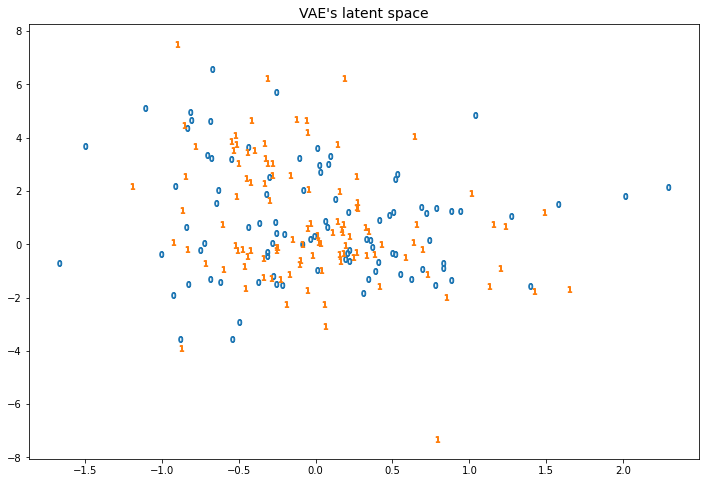

In [ ]:
# translate into the latent space
encoder = Model(input_img, z_mu)
X_encoded = encoder.predict(valX, batch_size=batch_size)

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
cmap = get_cmap("tab10")

for i in range(5):
    marker = "$" + str(i) + "$"
    idx = valy == i
    ax.scatter(X_encoded[idx, 0], X_encoded[idx, 1],
              marker=marker, color=cmap(i))
ax.set_title("VAE's latent space")

Text(0.5, 1.0, 'generated images by VAE')

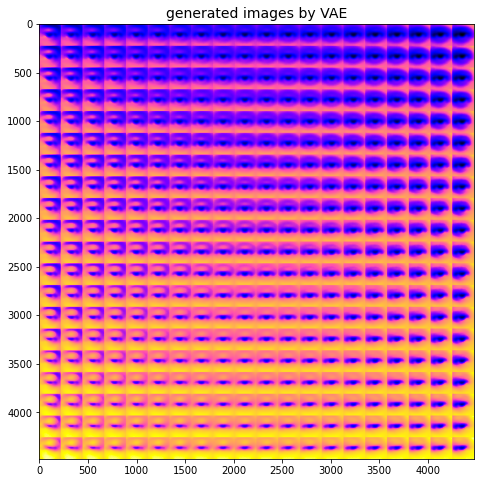

In [ ]:
# Display a 2D manifold of the digits
n = 20  # figure with 20x20 digits
digit_size = npix
figure = np.zeros((digit_size * n, digit_size * n))

# Construct grid of latent variable values
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

# decode for each square in the grid
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = decoder.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.imshow(figure, cmap='gnuplot2')
ax.set_title('generated images by VAE') 

## Encoder

https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34

In [27]:
import tensorflow as tf

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten()
  ])

In [29]:
from keras.models import load_model
best_model = load_model('/content/drive/MyDrive/Eyes_project/bestModel.h5')

In [30]:
from keras.models import Model
best_model = Model(best_model.input, best_model.layers[-8].output)
best_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 60, 60, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 32)        25600     
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0     

In [31]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

(1, 64, 64, 1)
1/1 [==============================] - 0s 93ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 24ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 28ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 24ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 22ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 20ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 27ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 33ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 26ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 22ms/

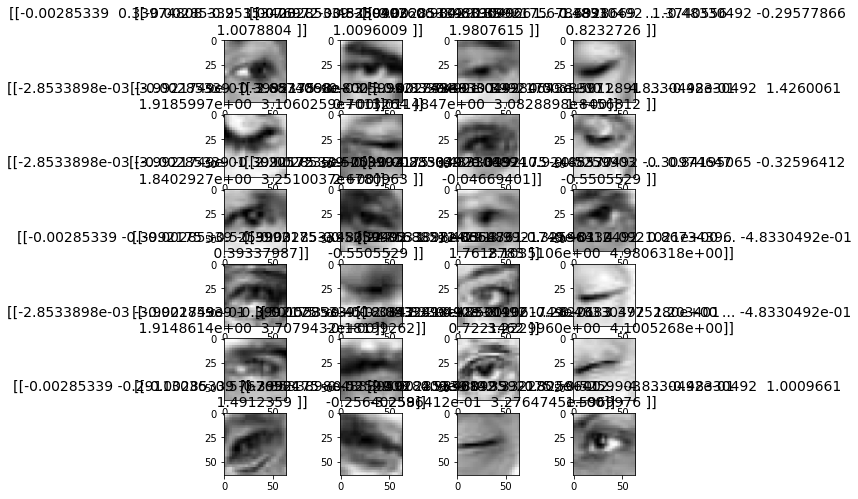

In [32]:
from PIL import Image
import matplotlib.pyplot as plt

img_size = 64
fig = plt.figure(figsize=(8, 8))
preds = []

for i in range(200):
  add = 4 - len(str(i))
  add = '0' * add
  img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/00' + add + str(i) + '.jpg',cv2.IMREAD_GRAYSCALE)
  img_array = cv2.resize(img_array, (64, 64), interpolation = cv2.INTER_AREA)
  X = np.array(img_array)
  X = X/255.0
  X = np.expand_dims(X,-1)
  X = X.reshape(1, X.shape[0], X.shape[1], 1)
  print(X.shape)
  if i < 24:
    fig.add_subplot(6, 4, i+1)
    plt.imshow(img_array, cmap = 'gray')
  prediction = best_model.predict(X)
  preds.append(prediction)
  if i < 24:
    plt.title(prediction)

In [33]:
preds = np.array(preds)
print(preds.shape)

(200, 1, 9216)


In [34]:
feat = preds.reshape(-1,9216)
print(feat.shape)

(200, 9216)


In [35]:
unique_labels = {0, 1}

In [36]:
# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [37]:
pca = PCA(n_components=100, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [38]:
kmeans = KMeans(n_clusters=len(unique_labels), random_state=22)
kmeans.fit(x)

KMeans(n_clusters=2, random_state=22)

In [39]:
kmeans.labels_

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1], dtype=int32)

In [40]:
df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [41]:
ans = df.to_numpy().transpose()[0]
print(ans)

[1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1
 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0]


In [43]:
acc = 0
for i in range(200):
  if kmeans.labels_[i] == ans[i]:
    acc += 1
print(acc/200)

0.495


# Mobilenet classification using manual marking

Обучаем модель на размеченных 200 изображениях.

In [58]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [59]:
import pandas as pd 

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

(24, 24)


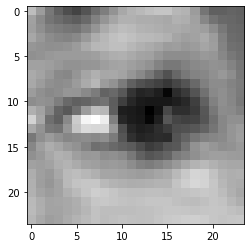

In [60]:
imgg_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/000000.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(imgg_array, cmap="gray")
img_size = imgg_array.shape
print(img_size)

In [61]:
training_data = []

path = '/content/drive/MyDrive/Eyes_project/EyesDataset'
print(sorted(os.listdir('/content/drive/MyDrive/Eyes_project/EyesDataset')))
img_size = 224

def create_training_data(i):
  for img in sorted(os.listdir('/content/drive/MyDrive/Eyes_project/EyesDataset')):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(backtorgb, (img_size,img_size))
        training_data.append([new_array, df['1'][i]])
        if i == 199:
          break
        i += 1
        if i % 10 == 0:
          print(i)

create_training_data(0)

['000000.jpg', '000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '0000

In [62]:
print(len(training_data))

200


In [63]:
import random
random.shuffle(training_data)

In [64]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [65]:
X.shape

(200, 224, 224, 3)

In [66]:
X = X/255.0
Y = np.array(y)

In [67]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [68]:
model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 1s 0us/step


In [69]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)
new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [70]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
new_model.fit(X,Y, epochs = 34, validation_split = 0.1)

Epoch 1/34
6/6 [==============================] - 19s 436ms/step - loss: 1.0613 - accuracy: 0.4833 - val_loss: 0.9349 - val_accuracy: 0.4500
Epoch 2/34
6/6 [==============================] - 1s 168ms/step - loss: 0.3639 - accuracy: 0.8444 - val_loss: 1.5997 - val_accuracy: 0.5000
Epoch 3/34
6/6 [==============================] - 1s 165ms/step - loss: 0.3473 - accuracy: 0.8778 - val_loss: 4.5178 - val_accuracy: 0.5000
Epoch 4/34
6/6 [==============================] - 1s 162ms/step - loss: 0.3368 - accuracy: 0.8889 - val_loss: 0.9899 - val_accuracy: 0.5500
Epoch 5/34
6/6 [==============================] - 1s 152ms/step - loss: 0.1472 - accuracy: 0.9333 - val_loss: 4.6773 - val_accuracy: 0.5000
Epoch 6/34
6/6 [==============================] - 1s 162ms/step - loss: 0.0943 - accuracy: 0.9722 - val_loss: 4.3702 - val_accuracy: 0.5000
Epoch 7/34
6/6 [==============================] - 1s 157ms/step - loss: 0.0374 - accuracy: 0.9944 - val_loss: 1.7603 - val_accuracy: 0.5000
Epoch 8/34
6/6 [===

In [71]:
new_model.save('my_model.h5')
new_model = tf.keras.models.load_model('my_model.h5')

Посмотрим на работу модели в действии. Возьмем изображения неразмеченные вручную.

In [72]:
img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/000456.jpg',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

(1, 224, 224, 3)


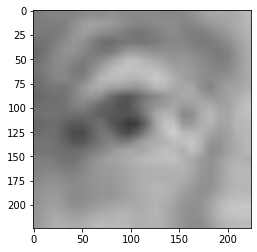

In [73]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
print(X_input.shape)
plt.imshow(new_array)

In [74]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
print(prediction)

1/1 [==============================] - 1s 733ms/step
[[0.3965543]]


Если глаз открыт, то предсказание должно быть ближе к 1.

In [75]:
img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/000555.jpg',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

(1, 224, 224, 3)


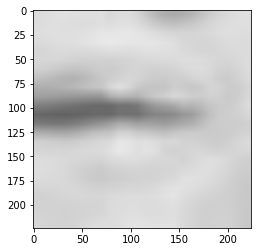

In [76]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
print(X_input.shape)
plt.imshow(new_array)

In [77]:
X_input = X_input/255.0
prediction = new_model.predict(X_input)
print(prediction)

1/1 [==============================] - 0s 26ms/step
[[0.9961123]]


In [79]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/hog_labels.csv')

1/1 [==============================] - 0s 25ms/step


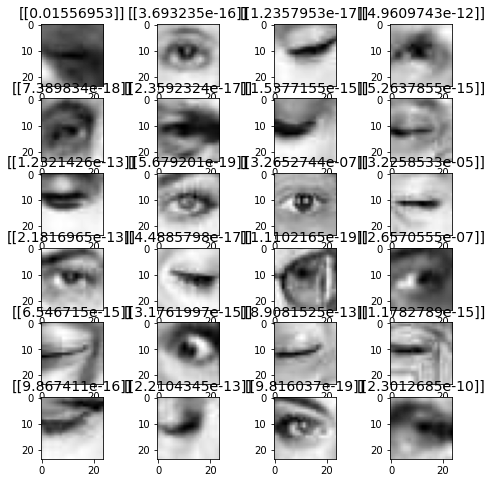

In [80]:
from PIL import Image
import matplotlib.pyplot as plt

img_size = 64
fig = plt.figure(figsize=(8, 8))
preds = []

for i in range(200):
  img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/' + df['Image'][i], cv2.IMREAD_GRAYSCALE)
  backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
  new_array = cv2.resize(backtorgb, (img_size, img_size))
  X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
  X_input = X_input/255.0
  if i < 24:
    fig.add_subplot(6, 4, i+1)
    plt.imshow(img_array, cmap = 'gray')
  prediction = new_model.predict(X_input)
  preds.append(round(prediction[0][0]))
  if i < 24:
    plt.title(prediction)

In [96]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/hog_labels.csv')

In [97]:
import numpy as np
from sklearn.metrics import roc_curve

y = df['Opened'].values.tolist()[0:200]
y_pred = preds
fpr, tpr, threshold = roc_curve(y, y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

0.6111111111111112


In [99]:
acc = 0
for i in range(200):
  if preds[i] == y[i]:
    acc += 1
print(acc/200)

0.605


# Mobilenet classification using clustering results

Обучим модель на метках, проставленных с помощью кластеризации(hog).

In [1]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Eyes_project/hog_labels.csv')

In [3]:
training_data = []

path = '/content/drive/MyDrive/Eyes_project/EyesDataset'
print(sorted(os.listdir('/content/drive/MyDrive/Eyes_project/EyesDataset')))
img_size = 224

def create_training_data(i):
  for img in sorted(os.listdir('/content/drive/MyDrive/Eyes_project/EyesDataset'))[200:]:
        img_array = cv2.imread(os.path.join(path,df['Image'][i]), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        new_array = cv2.resize(backtorgb, (img_size,img_size))
        training_data.append([new_array, df['Opened'][i]])
        i += 1
        if i % 100 == 0:
          print(i)

create_training_data(0)

['000000.jpg', '000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '000070.jpg', '0000

In [4]:
import random
random.shuffle(training_data)

In [5]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [6]:
X = X/255.0
Y = np.array(y)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.applications.mobilenet.MobileNet()

In [8]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)
new_model2 = keras.Model(inputs = base_input, outputs = final_output)
new_model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [9]:
new_model2.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
new_model2.fit(X,Y, epochs = 30, validation_split = 0.1)

Epoch 1/30
107/107 [==============================] - 43s 189ms/step - loss: 0.3577 - accuracy: 0.8620 - val_loss: 0.2348 - val_accuracy: 0.8868
Epoch 2/30
107/107 [==============================] - 17s 162ms/step - loss: 0.2047 - accuracy: 0.9196 - val_loss: 0.2391 - val_accuracy: 0.8895
Epoch 3/30
107/107 [==============================] - 18s 164ms/step - loss: 0.1776 - accuracy: 0.9281 - val_loss: 0.2358 - val_accuracy: 0.9237
Epoch 4/30
107/107 [==============================] - 17s 161ms/step - loss: 0.1398 - accuracy: 0.9480 - val_loss: 0.2194 - val_accuracy: 0.9184
Epoch 5/30
107/107 [==============================] - 17s 160ms/step - loss: 0.1077 - accuracy: 0.9608 - val_loss: 0.2740 - val_accuracy: 0.9053
Epoch 6/30
107/107 [==============================] - 17s 160ms/step - loss: 0.0946 - accuracy: 0.9646 - val_loss: 0.2975 - val_accuracy: 0.9105
Epoch 7/30
107/107 [==============================] - 17s 162ms/step - loss: 0.0781 - accuracy: 0.9678 - val_loss: 0.4842 - val_ac

In [10]:
new_model2.save('my_model2.h5')
new_model2 = tf.keras.models.load_model('my_model2.h5')

Посмотрим на работу модели в действии. Возьмем изображения, которые не использовались при обучении.

In [11]:
img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/000100.jpg',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

(1, 224, 224, 3)


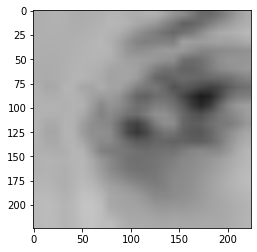

In [12]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
print(X_input.shape)
plt.imshow(new_array)

In [13]:
X_input = X_input/255.0
prediction = new_model2.predict(X_input)
print(prediction)

1/1 [==============================] - 1s 883ms/step
[[1.]]


In [14]:
img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/000111.jpg',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

(1, 224, 224, 3)


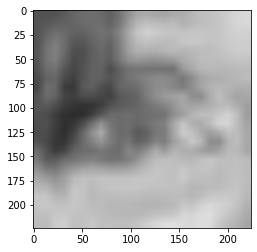

In [15]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
print(X_input.shape)
plt.imshow(new_array)

In [16]:
X_input = X_input/255.0
prediction = new_model2.predict(X_input)
print(prediction)

1/1 [==============================] - 0s 29ms/step
[[1.]]


Оценим качество на вручнуюю размеченных данныхю

1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 28ms/step


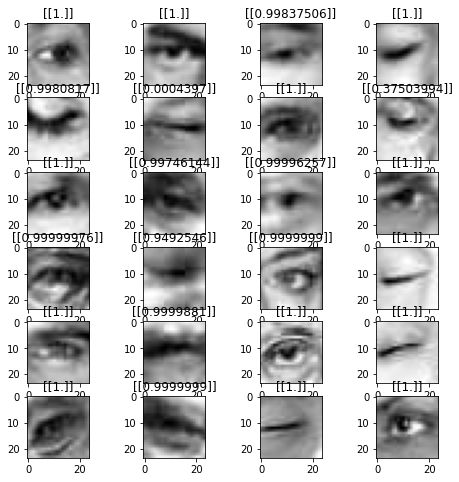

In [17]:
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
preds = []

for i in range(200):
  add = 4 - len(str(i))
  add = '0' * add
  img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/00' + add + str(i) + '.jpg',cv2.IMREAD_GRAYSCALE)
  backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
  new_array = cv2.resize(backtorgb, (img_size, img_size))
  X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
  X_input = X_input/255.0
  prediction = new_model2.predict(X_input)
  preds.append(round(prediction[0][0]))
  if i < 24:
    fig.add_subplot(6, 4, i+1)
    plt.imshow(img_array, cmap = 'gray')
    plt.title(prediction)

In [18]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [19]:
import numpy as np
from sklearn.metrics import roc_curve

y = df['1'].values.tolist()
y_pred = preds
fpr, tpr, threshold = roc_curve(y, y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

In [20]:
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

0.7311827956989247


In [21]:
acc = 0
for i in range(200):
  if preds[i] == y[i]:
    acc += 1
print(acc/200)

0.515


# Transfer learning

## Transfer learning Sequencial

https://www.kaggle.com/code/ahmedhossam666/drowsiness-detection-100-acc/notebook

Берем уже обученную на похожем датасете модель и оцениваем качество классификации на размеченных вручную данных.

In [22]:
import tensorflow as tf

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [24]:
from keras.models import load_model
best_model = load_model('/content/drive/MyDrive/Eyes_project/bestModel.h5')

In [25]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

(1, 64, 64, 1)
1/1 [==============================] - 0s 295ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 43ms/step
(1, 64, 64, 1)


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 27ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 25ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 25ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 25ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 24ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 24ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 24ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 25ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 23ms/step
(1, 64, 64, 1)
1/1 [==============================] - 0s 25ms/step
(1, 64, 64

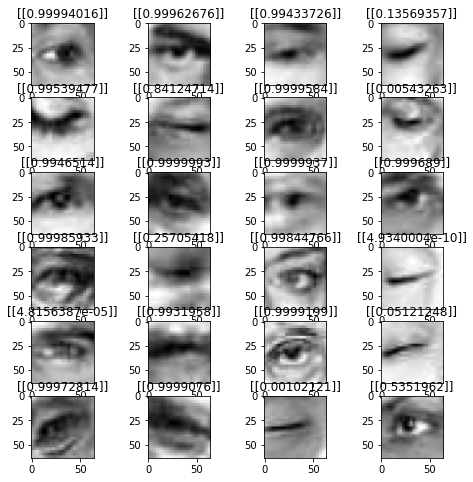

In [26]:
from PIL import Image
import matplotlib.pyplot as plt

img_size = 64
fig = plt.figure(figsize=(8, 8))
preds = []

for i in range(200):
  add = 4 - len(str(i))
  add = '0' * add
  img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/00' + add + str(i) + '.jpg',cv2.IMREAD_GRAYSCALE)
  img_array = cv2.resize(img_array, (64, 64), interpolation = cv2.INTER_AREA)
  X = np.array(img_array)
  X = X/255.0
  X = np.expand_dims(X,-1)
  X = X.reshape(1, X.shape[0], X.shape[1], 1)
  print(X.shape)
  if i < 24:
    fig.add_subplot(6, 4, i+1)
    plt.imshow(img_array, cmap = 'gray')
  prediction = best_model.predict(X)
  preds.append(round(prediction[0][0]))
  if i < 24:
    plt.title(prediction)

In [27]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [28]:
import numpy as np
from sklearn.metrics import roc_curve

y = df['1'].values.tolist()
y_pred = preds
fpr, tpr, threshold = roc_curve(y, y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

In [29]:
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

0.7204301075268817


In [30]:
acc = 0
for i in range(200):
  if preds[i] == y[i]:
    acc += 1
print(acc/200)

0.46


## Transfer learning Mobilenet

https://www.kaggle.com/code/prasadvpatil/eye-state-detection-drowsiness-detection/notebook

Берем уже обученную на похожем датасете модель и оцениваем качество классификации на размеченных вручную данных.

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.applications.mobilenet.MobileNet()

17225924/17225924 [==============================] - 0s 0us/step


In [4]:
base_input = model.layers[0].input
base_output = model.layers[-4].output
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)
new_modell = keras.Model(inputs = base_input, outputs = final_output)
new_modell.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [5]:
new_modell = tf.keras.models.load_model('/content/drive/MyDrive/Eyes_project/my_modell.h5')

1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 29ms/step


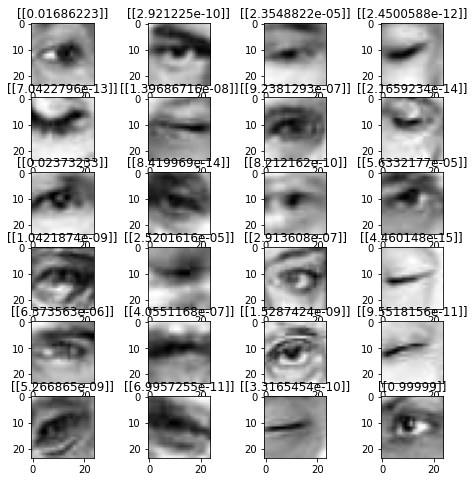

In [34]:
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
img_size = 224
preds = []

for i in range(200):
  add = 4 - len(str(i))
  add = '0' * add
  img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/00' + add + str(i) + '.jpg',cv2.IMREAD_GRAYSCALE)
  backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
  new_array = cv2.resize(backtorgb, (img_size, img_size))
  X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
  X_input = X_input/255.0
  prediction = new_modell.predict(X_input)
  preds.append(round(prediction[0][0]))
  if i < 24:
    fig.add_subplot(6, 4, i+1)
    plt.imshow(img_array, cmap = 'gray')
    plt.title(prediction)

In [35]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [36]:
import numpy as np
from sklearn.metrics import roc_curve

y = df['1'].values.tolist()
y_pred = preds
fpr, tpr, threshold = roc_curve(y, y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

In [37]:
EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

0.010752688172043012


In [39]:
acc = 0
for i in range(200):
  if preds[i] == y[i]:
    acc += 1
print(acc/200)

0.47


## Transfer learning VGG

https://www.kaggle.com/code/mahmoudreda55/closed-open-eyes/notebook

Берем уже обученную на похожем датасете модель и оцениваем качество классификации на размеченных вручную данных.

In [40]:
#import librarires
from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten
from keras.models import Sequential 
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras import layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing import image
import numpy as np

In [41]:
#build our model 
vgg_model =  VGG19(include_top=True , weights='imagenet')
for models in vgg_model.layers:
  models.trainable= False
vgg_model = keras.Model(inputs=vgg_model.input, outputs=vgg_model.layers[-2].output)
vgg = keras.Sequential()
for layer in vgg_model.layers:
  vgg.add(layer)
vgg.add(Dropout(0.2))
vgg.add(Dense(2, activation='softmax'))

574710816/574710816 [==============================] - 17s 0us/step


In [42]:
vgg.compile(optimizer=keras.optimizers.Adam(0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
vgg = tf.keras.models.load_model('/content/drive/MyDrive/Eyes_project/model_vgg.h5')

1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 25ms/step


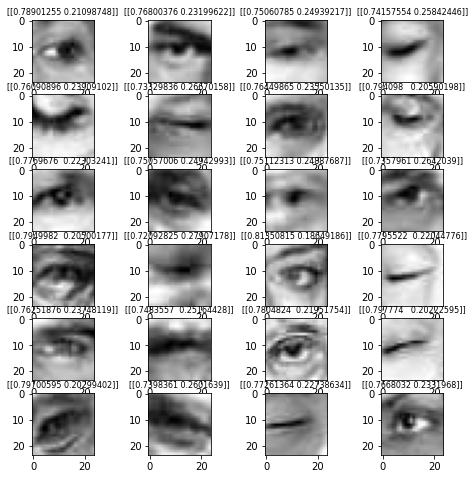

In [44]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(8, 8))
img_size = 224
preds = []

for i in range(200):
  add = 4 - len(str(i))
  add = '0' * add
  img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/00' + add + str(i) + '.jpg',cv2.IMREAD_GRAYSCALE)
  backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
  new_array = cv2.resize(backtorgb, (img_size, img_size))
  X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
  X_input = X_input/255.0
  prediction = vgg.predict(X_input)
  preds.append(np.argmax(prediction[0]))
  if i < 24:
    fig.add_subplot(6, 4, i+1)
    plt.imshow(img_array, cmap = 'gray')
    plt.title(prediction, fontsize = 8)

In [45]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [46]:
import numpy as np
from sklearn.metrics import roc_curve

y = df['1'].values.tolist()
y_pred = preds
fpr, tpr, threshold = roc_curve(y, y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

0.0


In [48]:
acc = 0
for i in range(200):
  if preds[i] == y[i]:
    acc += 1
print(acc/200)

0.465


# Finetuning

Возьмем модель, показавшую лучшее качество при переносном обучении и доучим ее на размеченных вручную данных. Протестируем на 200 изображениях, размеченных с помощью кластеризации.

In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model

best_model = tf.keras.models.load_model('/content/drive/MyDrive/Eyes_project/my_modell.h5')

In [21]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [22]:
df = pd.read_csv('/content/drive/MyDrive/Eyes_project/sc_labels.csv')

In [28]:
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
img_size = 224
x_train = []
y_train = []

for i in range(200):
  add = 4 - len(str(i))
  add = '0' * add
  img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/00' + add + str(i) + '.jpg',cv2.IMREAD_GRAYSCALE)
  backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
  new_array = cv2.resize(backtorgb, (img_size, img_size))
  X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
  X_input = X_input/255.0
  x_train.append(X_input)
  y_train.append(df['1'][i])
  
x_train =  np.array(x_train).reshape(-1, img_size, img_size, 3)

<Figure size 576x576 with 0 Axes>

In [35]:
best_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [30]:
x_train.shape

(200, 224, 224, 3)

In [32]:
y_train = np.array(y_train)

In [36]:
best_model.fit(x_train,y_train, epochs = 10, validation_split = 0.1)

Epoch 1/10
6/6 [==============================] - 27s 422ms/step - loss: 4.9879 - accuracy: 0.5000 - val_loss: 1.9983 - val_accuracy: 0.5000
Epoch 2/10
6/6 [==============================] - 1s 118ms/step - loss: 1.2074 - accuracy: 0.5778 - val_loss: 4.8096 - val_accuracy: 0.4000
Epoch 3/10
6/6 [==============================] - 1s 117ms/step - loss: 0.5755 - accuracy: 0.7167 - val_loss: 3.7159 - val_accuracy: 0.4000
Epoch 4/10
6/6 [==============================] - 1s 123ms/step - loss: 0.3617 - accuracy: 0.8944 - val_loss: 4.2421 - val_accuracy: 0.4000
Epoch 5/10
6/6 [==============================] - 1s 116ms/step - loss: 0.2653 - accuracy: 0.9333 - val_loss: 3.7472 - val_accuracy: 0.4000
Epoch 6/10
6/6 [==============================] - 1s 125ms/step - loss: 0.1361 - accuracy: 0.9833 - val_loss: 3.3657 - val_accuracy: 0.4000
Epoch 7/10
6/6 [==============================] - 1s 119ms/step - loss: 0.0735 - accuracy: 0.9944 - val_loss: 3.2631 - val_accuracy: 0.4000
Epoch 8/10
6/6 [===

In [37]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Eyes_project/hog_labels.csv')

1/1 [==============================] - 2s 2s/step


/usr/local/lib/python3.8/dist-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


1/1 [==============================] - 0s 25ms/step


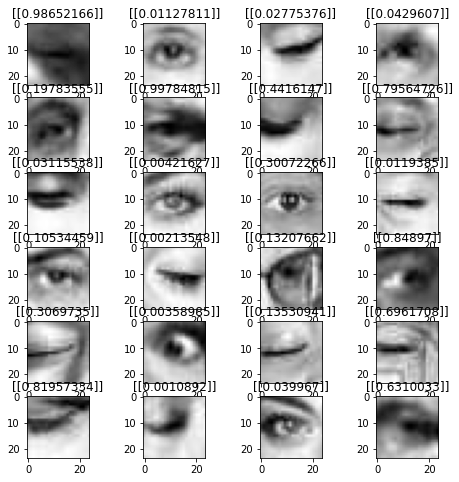

In [39]:
from PIL import Image
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
img_size = 224
preds = []

for i in range(200):
  img_array = cv2.imread('/content/drive/MyDrive/Eyes_project/EyesDataset/' + df['Image'][i],cv2.IMREAD_GRAYSCALE)
  backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
  new_array = cv2.resize(backtorgb, (img_size, img_size))
  X_input = np.array(new_array).reshape(1, img_size, img_size, 3)
  X_input = X_input/255.0
  prediction = best_model.predict(X_input)
  preds.append(round(prediction[0][0]))
  if i < 24:
    fig.add_subplot(6, 4, i+1)
    plt.imshow(img_array, cmap = 'gray')
    plt.title(prediction)

In [40]:
import numpy as np
from sklearn.metrics import roc_curve

y = df['Opened'].values.tolist()[0:200]
y_pred = preds
fpr, tpr, threshold = roc_curve(y, y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

EER = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
print(EER)

0.3333333333333333


In [41]:
acc = 0
for i in range(200):
  if preds[i] == y[i]:
    acc += 1
print(acc/200)

0.45
